### Classe Preditora de Demanda de Compartilhamento de Bikes
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

In [2]:
training = pd.read_csv("data/training.csv")
testing = pd.read_csv("data/testing.csv")

training.set_index('dteday', inplace=True)
testing.set_index('dteday', inplace=True)

In [3]:
training

yr  hr  temp   hum  windspeed  cnt  cnt_lag_1  cnt_lag_2  \
dteday                                                                 
2011-01-01   0   0  0.24  0.81     0.0000   16       40.0       32.0   
2011-01-01   0   1  0.22  0.80     0.0000   40       32.0       13.0   
2011-01-01   0   2  0.22  0.80     0.0000   32       13.0        1.0   
2011-01-01   0   3  0.24  0.75     0.0000   13        1.0        1.0   
2011-01-01   0   4  0.24  0.75     0.0000    1        1.0        2.0   
...         ..  ..   ...   ...        ...  ...        ...        ...   
2012-11-01   1  19  0.40  0.50     0.1642  452      296.0      267.0   
2012-11-01   1  20  0.38  0.54     0.2537  296      267.0      202.0   
2012-11-01   1  21  0.38  0.54     0.1343  267      202.0      120.0   
2012-11-01   1  22  0.36  0.57     0.1642  202      120.0       50.0   
2012-11-01   1  23  0.34  0.57     0.1642  120       50.0       24.0   

            season=1  season=2  ...  mnth=10  mnth=11  mnth=12  weekday=0  \
dteday                          ...                                         
2011-01-01       1.0       0.0  ...      0.0      0.0      0.0        0.0   
2011-01-01       1.0       0.0  ...      0.0      0.0      0.0        0.0   
2011-01-01       1.0       0.0  ...      0.0      0.0      0.0        0.0   
2011-01-01       1.0       0.0  ...      0.0      0.0      0.0        0.0   
2011-01-01       1.0       0.0  ...      0.0      0.0      0.0        0.0   
...              ...       ...  ...      ...      ...      ...        ...   
2012-11-01       0.0       0.0  ...      0.0      1.0      0.0        0.0   
2012-11-01       0.0       0.0  ...      0.0      1.0      0.0        0.0   
2012-11-01       0.0       0.0  ...      0.0      1.0      0.0        0.0   
2012-11-01       0.0       0.0  ...      0.0      1.0      0.0        0.0   
2012-11-01       0.0       0.0  ...      0.0      1.0      0.0        0.0   

            weekday=1  weekday=2  weekday=3  weekday=4  weekday=5  weekday=6  
dteday                                                                        
2011-01-01        0.0        0.0        0.0        0.0        0.0        1.0  
2011-01-01        0.0        0.0        0.0        0.0        0.0        1.0  
2011-01-01        0.0        0.0        0.0        0.0        0.0        1.0  
2011-01-01        0.0        0.0        0.0        0.0        0.0        1.0  
2011-01-01        0.0        0.0        0.0        0.0        0.0        1.0  
...               ...        ...        ...        ...        ...        ...  
2012-11-01        0.0        0.0        0.0        1.0        0.0        0.0  
2012-11-01        0.0        0.0        0.0        1.0        0.0        0.0  
2012-11-01        0.0        0.0        0.0        1.0        0.0        0.0  
2012-11-01        0.0        0.0        0.0        1.0        0.0        0.0  
2012-11-01        0.0        0.0        0.0        1.0        0.0        0.0  

[15943 rows x 39 columns]

In [4]:
features = list(training.columns)
features.remove("cnt")
target = ["cnt"]

In [5]:
X_train, y_train = training[features], training[target]
X_test, y_test = testing[features], testing[target]

In [6]:
# Hyperparameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 7000, num = 200)]
# Number of features to consider at every split
max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 7, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap
}

In [7]:
# Cross validate — time series split
tscv = TimeSeriesSplit(n_splits=5)

In [8]:
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = tscv, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: 

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2045; total time=   8.6s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2045; total time=  12.6s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2045; total time=  18.3s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2045; total time=  21.6s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2045; total time=  31.8s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2250; total time=  26.5s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2250; total time=  34.4s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=6863; total time= 1.3min


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2250; total time=  57.5s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2250; total time= 1.4min


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2250; total time= 1.7min


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=6692; total time= 1.5min


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=6863; total time= 2.7min


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=6179; total time=  31.4s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=6692; total time= 2.5min


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=6863; total time= 4.1min


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=6179; total time=  51.1s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=6179; total time=  52.2s


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=6179; total time= 1.3min


/home/shazam/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
# Best parameters
rf_random.best_params_
"""
'n_estimators': 746,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 7,
 'bootstrap': True
"""

NameError: name 'rf_random' is not defined

In [28]:
model = RandomForestRegressor(max_depth=7, n_estimators = 746, min_samples_split=5,min_samples_leaf=1, max_features='auto',random_state=42, bootstrap=True)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_pred))

/tmp/ipykernel_46361/612605446.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [42]:
print("RMSLE")
print(train_rmsle)
print(test_rmsle)

print("MAE")
print(mean_absolute_error(y_train, train_pred))
print(mean_absolute_error(y_test, test_pred))

print("MAPE")
print(mean_absolute_percentage_error(y_train, train_pred)) 
print(mean_absolute_percentage_error(y_test, test_pred)) 

MAE
26.9146608758479
32.07704915428945
25.44427630357526
MAPE
0.34712895018645873
0.2822980209393622
0.3686422794582396


In [31]:
training["pred"] = train_pred
train_agg = training.groupby(["dteday"]).agg({"cnt":"sum","pred":"sum"}).reset_index()
traintmp_rmsle = np.sqrt(mean_squared_log_error(train_agg["cnt"], train_agg["pred"]))

testing["pred"] = test_pred
test_agg = testing.groupby(["dteday"]).agg({"cnt":"sum","pred":"sum"}).reset_index()
testtmp_rmsle = np.sqrt(mean_squared_log_error(test_agg["cnt"], test_agg["pred"]))

In [32]:
print("R2")
result = model.score(X_train, y_train)
print(result)

result = model.score(X_test, y_test)
print(result)

0.9480781944732948
0.9299785006426757
0.9424476853727493


In [33]:
print(traintmp_rmsle)
print(testtmp_rmsle)
print(validtmp_rmsle)

0.08892157300501834
0.037284348457595
0.12266534005924926


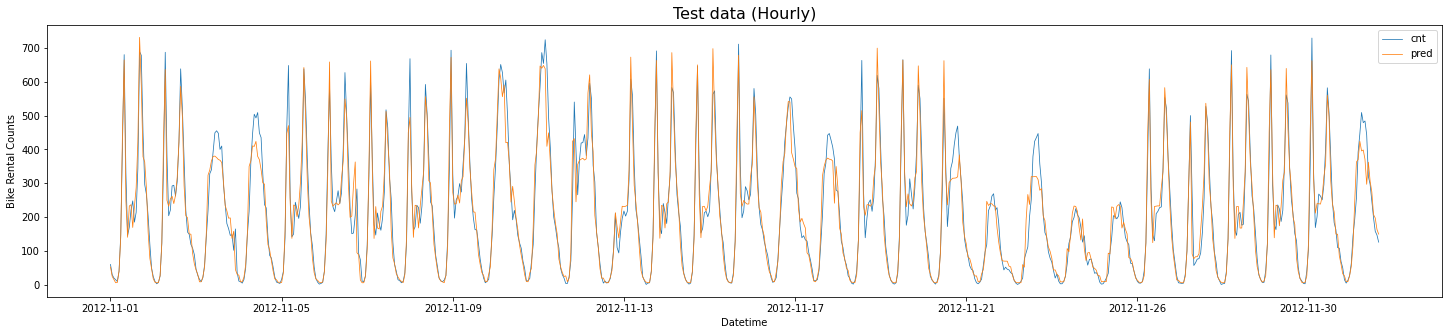

In [24]:
fig, ax = plt.subplots(figsize=(25, 5))
testing["cnt"].plot(linewidth=0.75, ax=ax)
testing["pred"].plot(linewidth=0.75, ax=ax)
ax.set_ylabel("Bike Rental Counts")
ax.set_xlabel("Datetime")
ax.set_title("Test data (Hourly)", fontsize=16)
ax.legend(loc='best')
fig.savefig(f"regression/Test Data (Hourly).png")

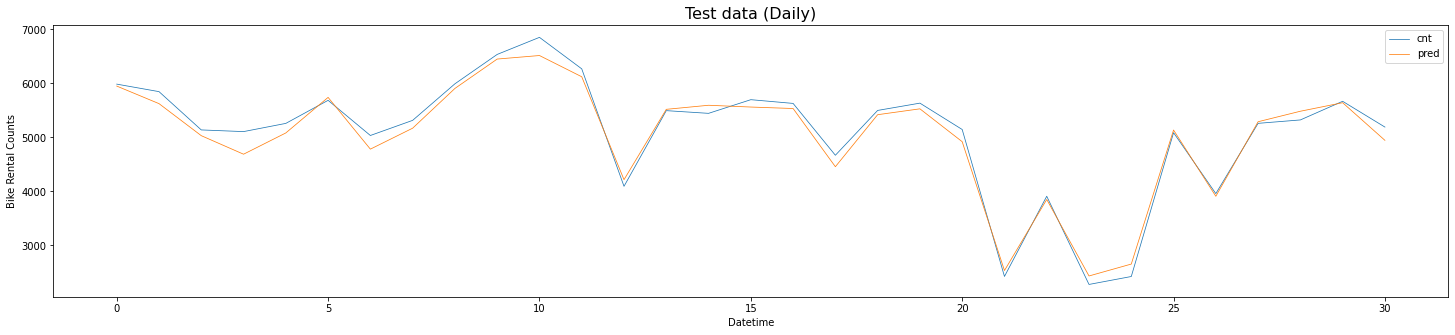

In [36]:
fig, ax = plt.subplots(figsize=(25, 5))
test_tmp["cnt"].plot(linewidth=0.75, ax=ax)
test_tmp["pred"].plot(linewidth=0.75, ax=ax)
ax.set_ylabel("Bike Rental Counts")
ax.set_xlabel("Datetime")
ax.set_title("Test data (Daily)", fontsize=16)
ax.legend(loc='best')
fig.savefig(f"regression/Test Data (Daily).png")

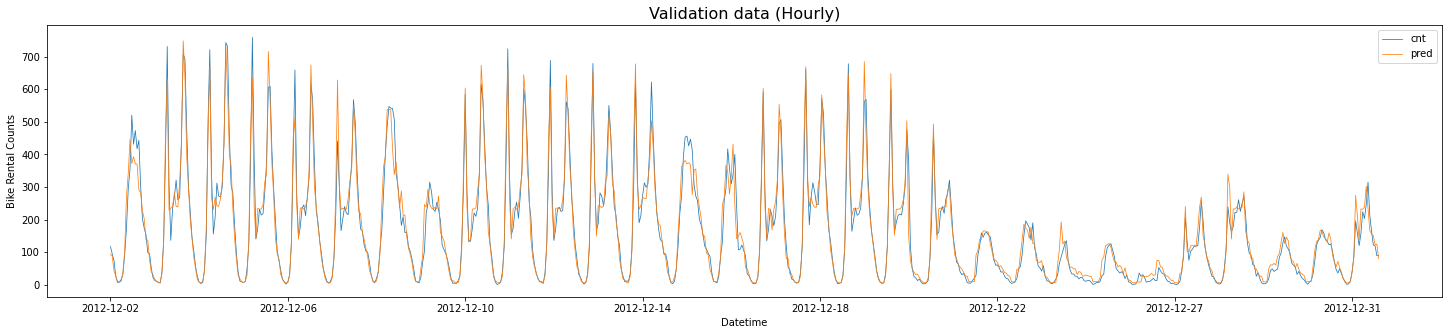

In [34]:
fig, ax = plt.subplots(figsize=(25, 5))
validation["cnt"].plot(linewidth=0.75, ax=ax)
validation["pred"].plot(linewidth=0.75, ax=ax)
ax.set_ylabel("Bike Rental Counts")
ax.set_xlabel("Datetime")
ax.set_title("Validation data (Hourly)", fontsize=16)
ax.legend(loc='best')
fig.savefig(f"regression/Validation Data (Hourly).png")

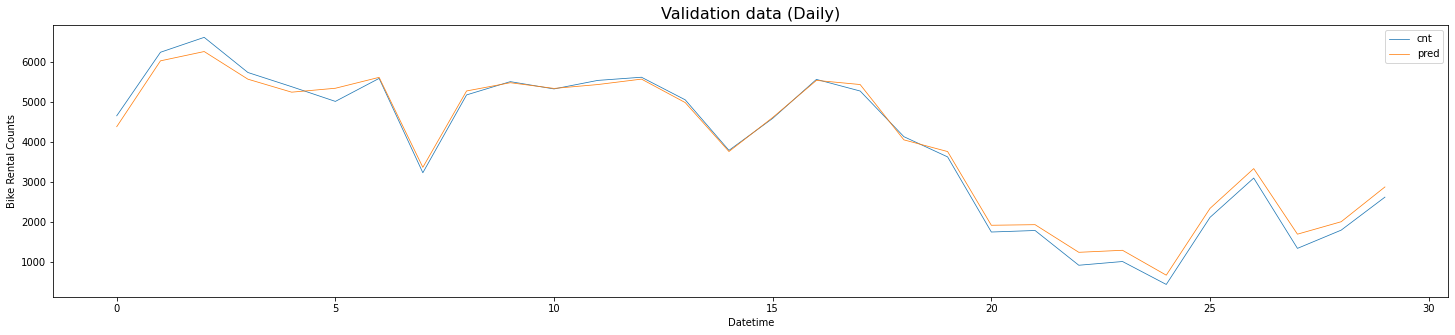

In [37]:
fig, ax = plt.subplots(figsize=(25, 5))
valid_tmp["cnt"].plot(linewidth=0.75, ax=ax)
valid_tmp["pred"].plot(linewidth=0.75, ax=ax)
ax.set_ylabel("Bike Rental Counts")
ax.set_xlabel("Datetime")
ax.set_title("Validation data (Daily)", fontsize=16)
ax.legend(loc='best')
fig.savefig(f"regression/Validation Data (Daily).png")

In [38]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [147]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

0.9299775742192237
